In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [ ]:
import nltk
import os


custom_download_path = '/content/test_data.txt'

# Check if the path exists before attempting to create it
if not os.path.exists(custom_download_path):
    # Make sure the directory exists; if not, create it
    os.makedirs(custom_download_path, exist_ok=True)
else:
    print(f"Path '{custom_download_path}' already exists.")

# Append the custom download path to NLTK data path
nltk.data.path.append(custom_download_path)

# Download NLTK resources to the custom path
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Path '/content/test_data.txt' already exists.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [ ]:
train= pd.read_csv("/content/train_data.txt", delimiter=':::' ,header = None ,engine='python')
test= pd.read_csv("/content/test_data.txt", delimiter=':::' ,header = None ,engine='python')
test_solution  = pd.read_csv("/content/test_data_solution.txt", delimiter=':::' ,header = None ,engine='python')

In [ ]:
## View train data
print("shape",train.shape)
train.head()

shape (54214, 4)


,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
data = pd.concat((train ,test))
data.columns = ["id" ,"Title","Genre","Description"]
data.head()

,id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
data.shape

(108414, 4)

In [ ]:
## Check for nan values

data.isna().sum()  # Will check for any duplicates
data.dropna( inplace = True ) ## Will drop any nan containing row if exists


In [ ]:
## Check the size
data.shape

(54214, 4)

In [ ]:
stopword = set(stopwords.words('english'))
def preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[#@\$]', '', text)
    tokens = word_tokenize(text)
    lemmatizer  = WordNetLemmatizer()
    text = text.split()
    text = [word for word in text if word not in stopword]
    return " ".join(text)

In [ ]:
data["Despcription_clean"] =  data["Description"].apply(preprocessing)

In [ ]:
data.head(5)


,id,Title,Genre,Description,Despcription_clean
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [ ]:
## Shows us the label counts
data["Genre"].value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

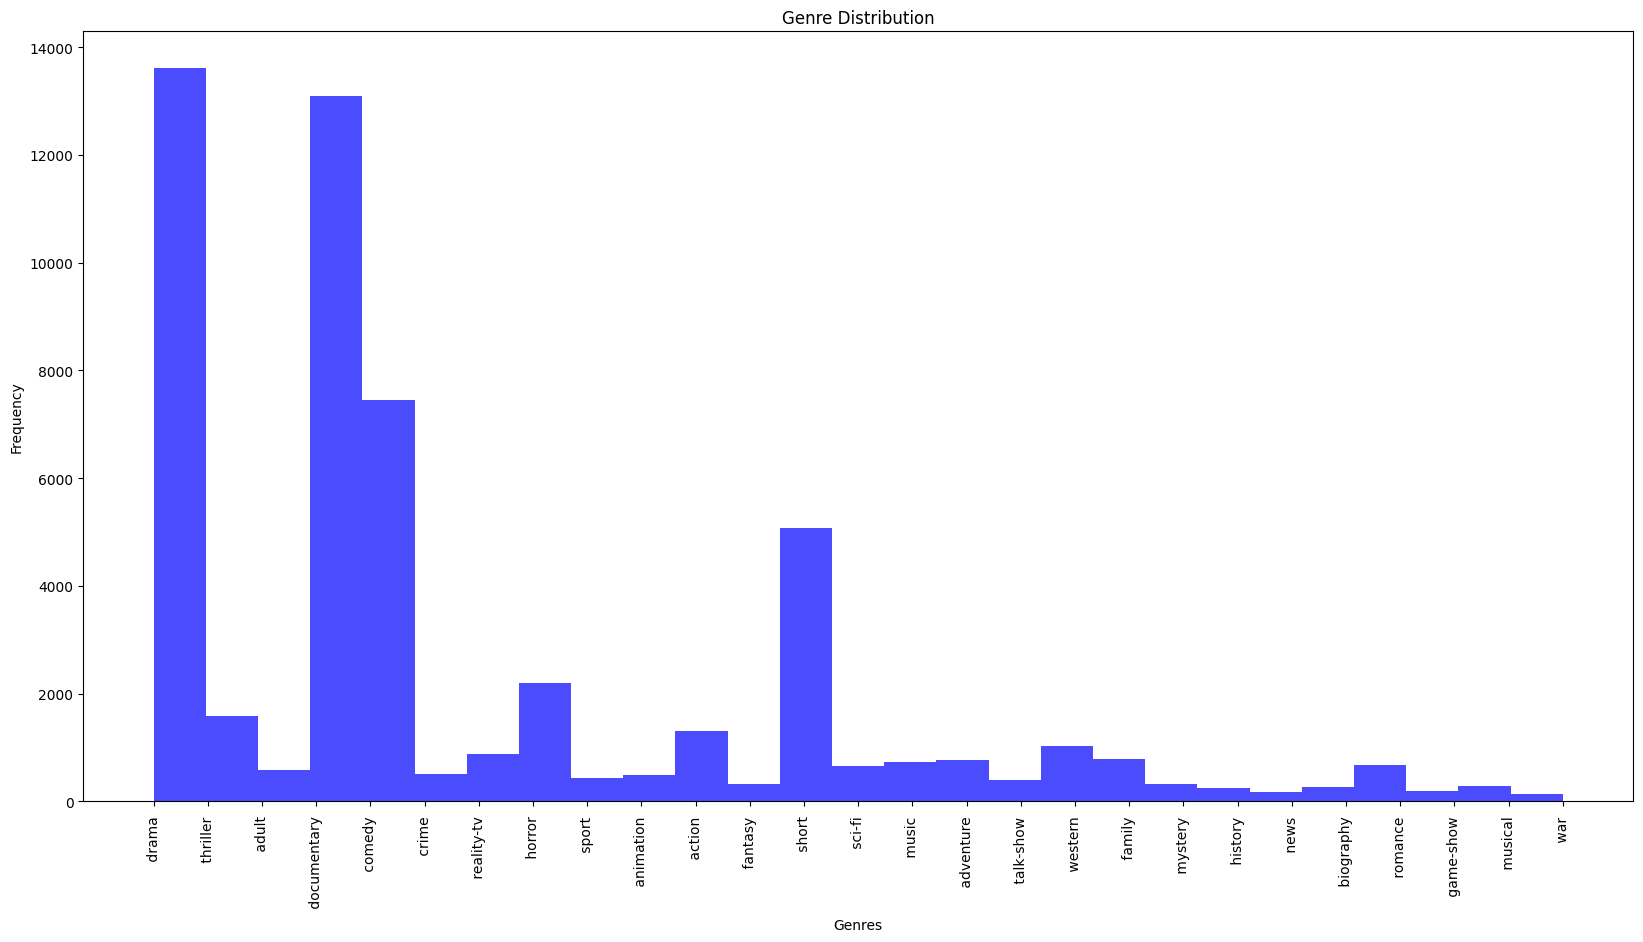

In [ ]:
# Create a histogram of genre distribution
plt.figure(figsize=(20, 10))
plt.hist(data["Genre"],bins =27 , color='blue', alpha=0.7)
plt.title("Genre Distribution")
plt.xlabel("Genres")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


In [ ]:
## remove id column from head
data = data.drop(["Title","id"] , axis = 1) # will drop column
data.head()


,Genre,Description,Despcription_clean
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [ ]:
## import necessary library for
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay


In [ ]:
#Convert sentiment labels to numerical values for modeling
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Genre_encoded'] = label_encoder.fit_transform(data['Genre'])
data['Genre_encoded']

class_names= list(label_encoder.classes_)
class_names

[' action ',
 ' adult ',
 ' adventure ',
 ' animation ',
 ' biography ',
 ' comedy ',
 ' crime ',
 ' documentary ',
 ' drama ',
 ' family ',
 ' fantasy ',
 ' game-show ',
 ' history ',
 ' horror ',
 ' music ',
 ' musical ',
 ' mystery ',
 ' news ',
 ' reality-tv ',
 ' romance ',
 ' sci-fi ',
 ' short ',
 ' sport ',
 ' talk-show ',
 ' thriller ',
 ' war ',
 ' western ']

In [ ]:
data.head()

,Genre,Description,Despcription_clean,Genre_encoded
0,drama,Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...,8
1,thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,24
2,adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,1
3,drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,8
4,drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...,8


In [ ]:
## Split the data
x = data["Despcription_clean"]
y = data["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)


In [ ]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 =  vectorize.transform(x_test)

Model Score on Training data 0.6532629947983916
Model Score on Training data 0.5093149371011177
               precision    recall  f1-score   support

      action        0.02      1.00      0.03        11
       adult        0.02      0.56      0.03         9
   adventure        0.02      0.50      0.04        18
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         1
      comedy        0.38      0.54      0.45      2592
       crime        0.00      0.00      0.00         0
 documentary        0.90      0.56      0.69     10741
       drama        0.84      0.44      0.58     12878
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.07      1.00      0.12         7
     history        0.00      0.00      0.00         0
      horror        0.19      0.76      0.31       278
       music        0.02      0.67      0.03         9
     musical        0.0

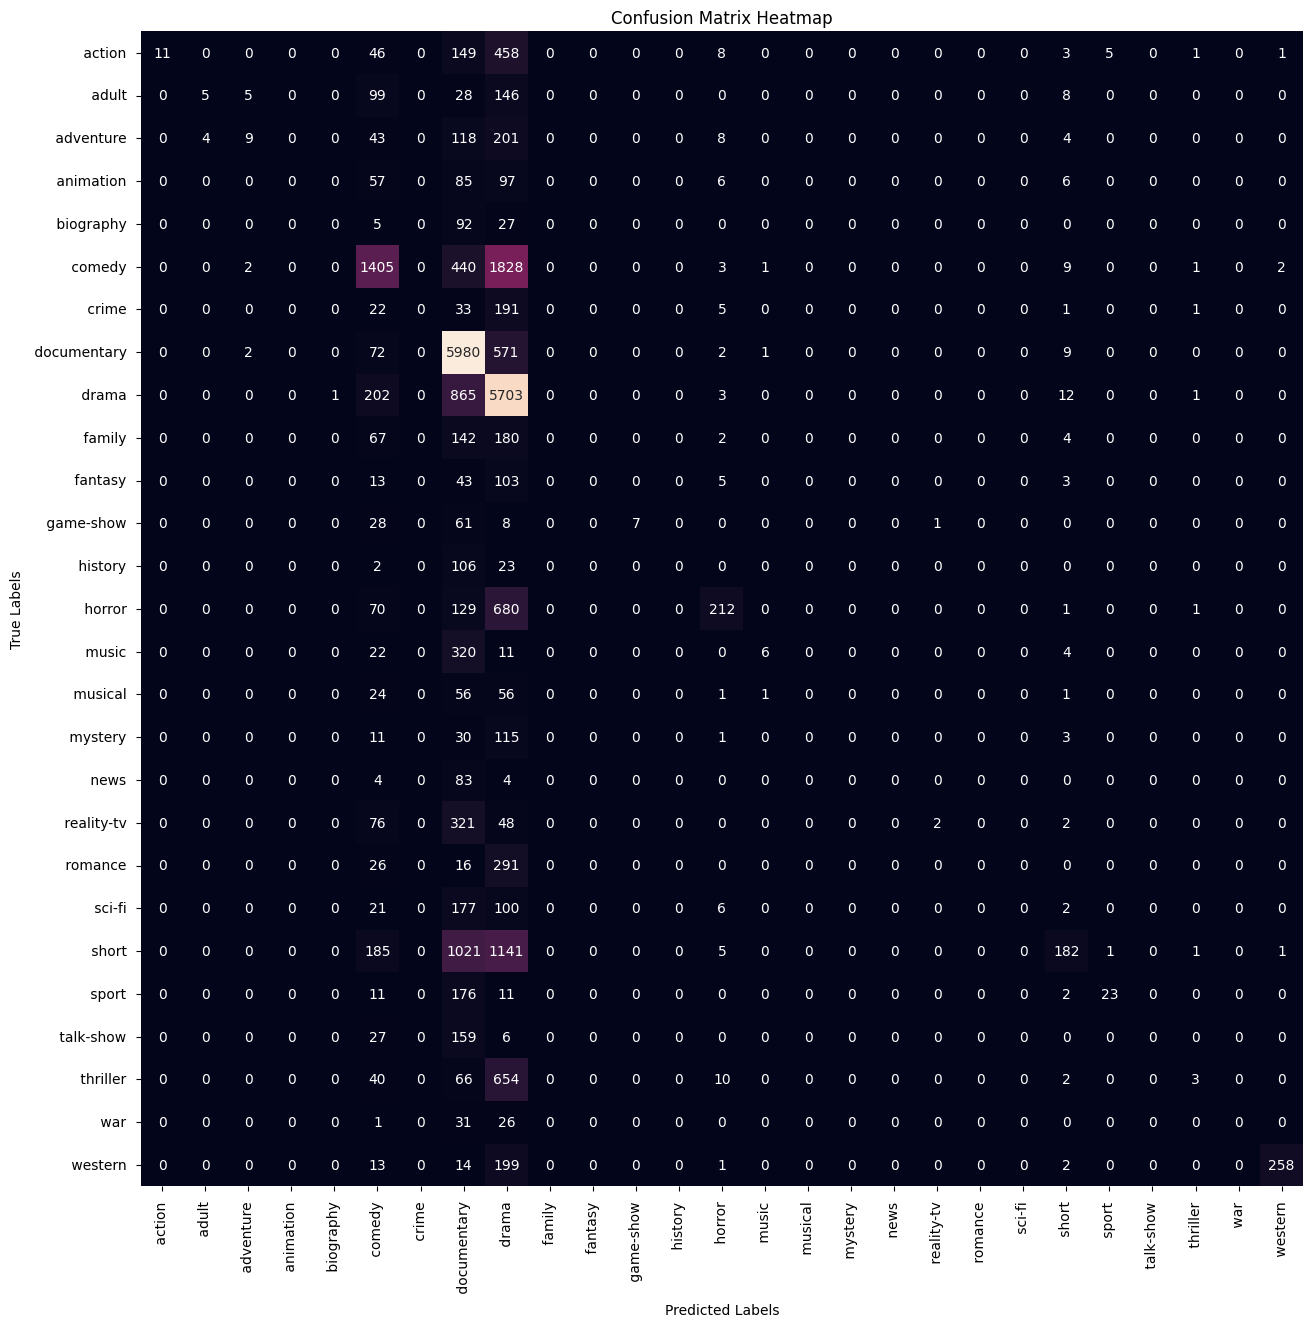

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train1 ,y_train)
print("Model Score on Training data",mnb.score(x_train1 ,y_train))
print("Model Score on Training data",mnb.score(x_test1 ,y_test))
y_pred = mnb.predict(x_test1)

print(classification_report(y_pred ,y_test))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()



Model Score on Training data 0.999225292359907
Model Score on Training data 0.5545799977865496
               precision    recall  f1-score   support

      action        0.27      0.43      0.33       429
       adult        0.30      0.71      0.42       121
   adventure        0.19      0.40      0.26       188
   animation        0.14      0.37      0.20        91
   biography        0.00      0.00      0.00        13
      comedy        0.56      0.50      0.53      4127
       crime        0.06      0.22      0.09        69
 documentary        0.78      0.69      0.73      7545
       drama        0.68      0.54      0.61      8532
      family        0.12      0.31      0.17       150
     fantasy        0.07      0.31      0.12        39
   game-show        0.48      0.78      0.59        64
     history        0.02      0.18      0.03        11
      horror        0.58      0.63      0.61      1015
       music        0.46      0.65      0.54       257
     musical        0.05

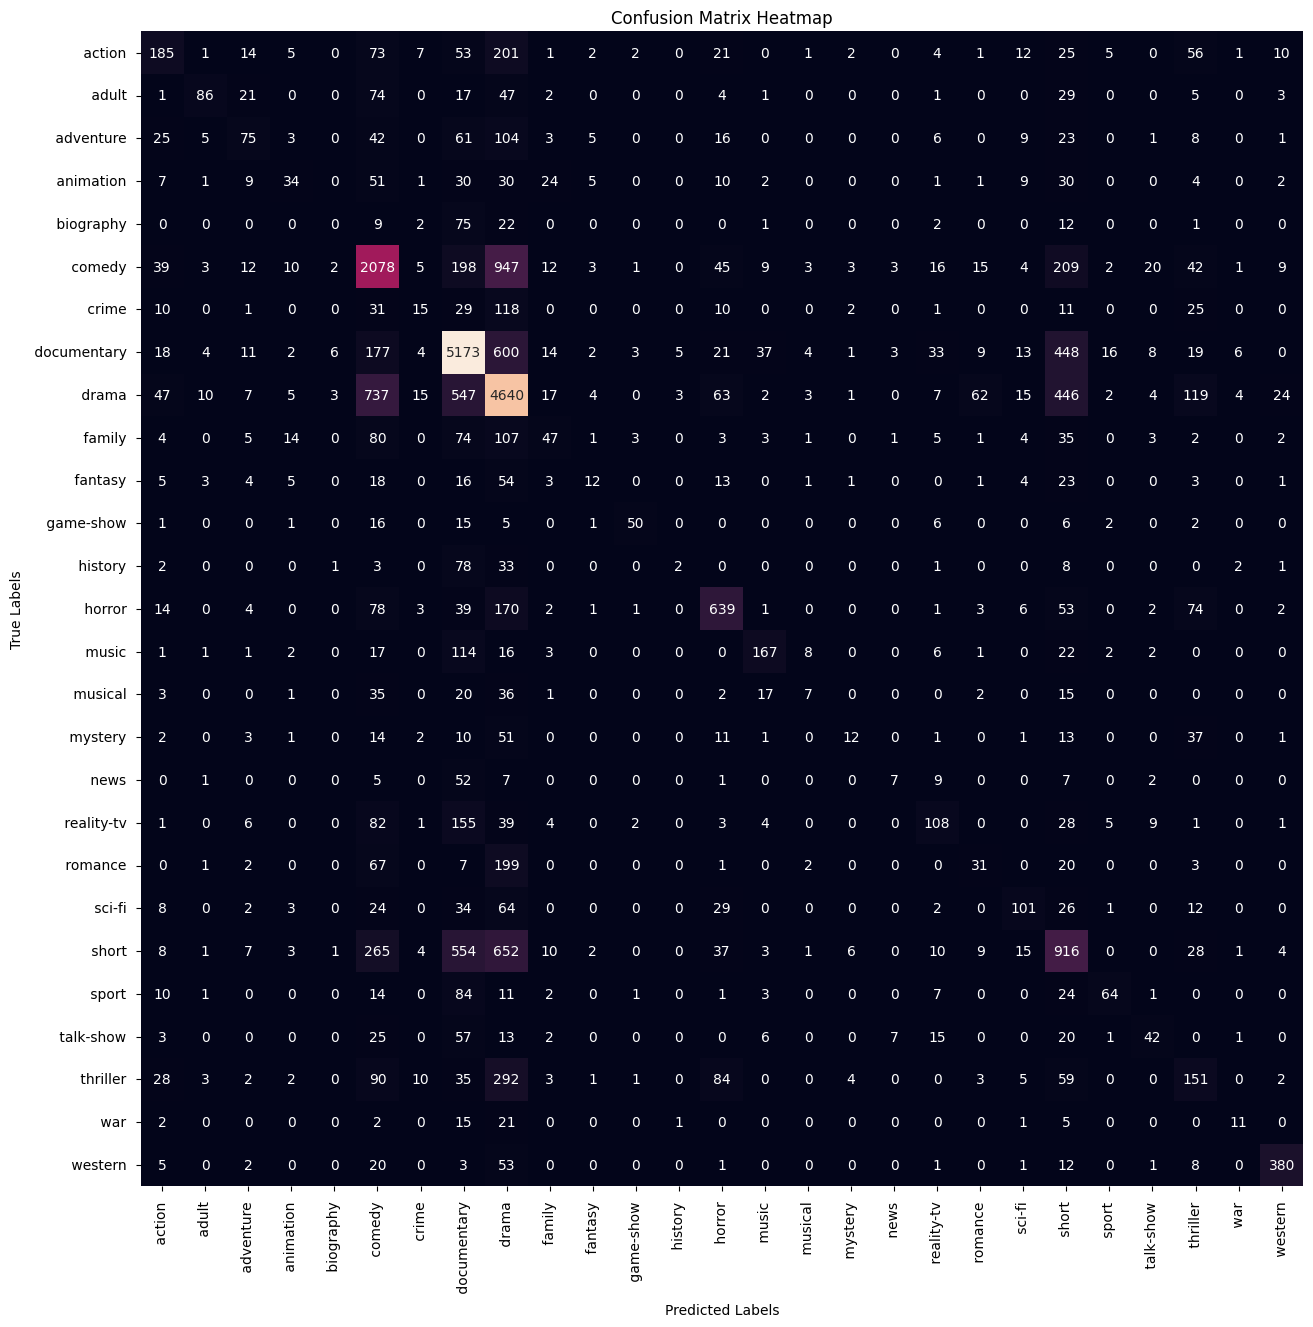

In [ ]:
## select Logistic regression for this
model = LogisticRegression()
model.fit(x_train1 ,y_train)
print("Model Score on Training data",model.score(x_train1 ,y_train))
print("Model Score on Training data",model.score(x_test1 ,y_test))
y_pred = model.predict(x_test1)
print(classification_report(y_pred ,y_test))
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)  # Replace 'class_names' with your class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
